In [16]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)



In [4]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [17]:
#Loading the dataset
data = pd.read_csv(r'C:\Users\hrith\Downloads\Oasis\marketing_campaign.csv', sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [18]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above output, we can conclude and note that:

There are missing values in income
Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

In [19]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [20]:
# In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. 
# However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.
# Thus to get the values I must check the newest and oldest recorded dates.


# Convert 'Dt_Customer' to datetime with the correct format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')

# Now extract dates
dates = []
for i in data["Dt_Customer"]:
    i=i.date()
    dates.append(i)  

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))



The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [21]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


In [22]:
# Now we will be exploring the unique values in the categorical features to get a clear idea of the data.
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [23]:
# Importing necessary libraries
from datetime import datetime
import numpy as np
import pandas as pd

# Assuming the dataset is loaded into 'data'
data = pd.read_csv(r'C:\Users\hrith\Downloads\Oasis\marketing_campaign.csv', sep="\t")

# Feature Engineering

# Get the current year dynamically
current_year = datetime.now().year

# Age of customer today
data["Age"] = current_year - data["Year_Birth"]

# Total spendings on various items
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Deriving living situation by marital status "Alone"
data["Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner", 
    "Together": "Partner", 
    "Absurd": "Alone", 
    "Widow": "Alone", 
    "YOLO": "Alone", 
    "Divorced": "Alone", 
    "Single": "Alone"
})

# Feature indicating total children living in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]

# Feature for total members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# Feature pertaining to parenthood
data["Is_Parent"] = np.where(data["Children"] > 0, 1, 0)

# Segmenting education levels into three groups
data["Education"] = data["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate", 
    "Graduation": "Graduate", 
    "Master": "Postgraduate", 
    "PhD": "Postgraduate"
})

# For clarity, renaming columns for products
data = data.rename(columns={
    "MntWines": "Wines", 
    "MntFruits": "Fruits", 
    "MntMeatProducts": "Meat", 
    "MntFishProducts": "Fish", 
    "MntSweetProducts": "Sweets", 
    "MntGoldProds": "Gold"
})

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

# Display the first few rows of the modified dataset
print(data.head())


      Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0   172      88  ...             0             0         0         1   67   
1     2       1  ...             0             0         0         0   70   
2   111      21  ...             0             0         0         0   59   
3    10       3  ...             0             0         0         0   40   
4    46      27  ...             0             0         0         0   43   

   Spent  Living_With  Children  Family_Size  Is_Parent  
0   1617        

In [24]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.251354     0.444196     0.506250    49.109375   303.935714   
std     25173.076661     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68522.000000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.072768      0.064286      0.013393     0.009375     0.149107   
std        0.259813      0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  
mean     55.194196   605.798214     0.950446     2.595089     0.715179  
std      11.984069   602.249288     0.751803     0.906959     0.451430  
min      28.000000     5.000000     0.000000     1.000000     0.000000  
25%      47.000000    68.750000     0.000000     2.000000     0.000000  
50%      54.000000   396.000000     1.000000     3.000000     1.000000  
75%      65.000000  1045.500000     1.000000     3.000000     1.000000  
max     131.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 27 columns]

Relative Plot of Some Selected Features: A Data Subset


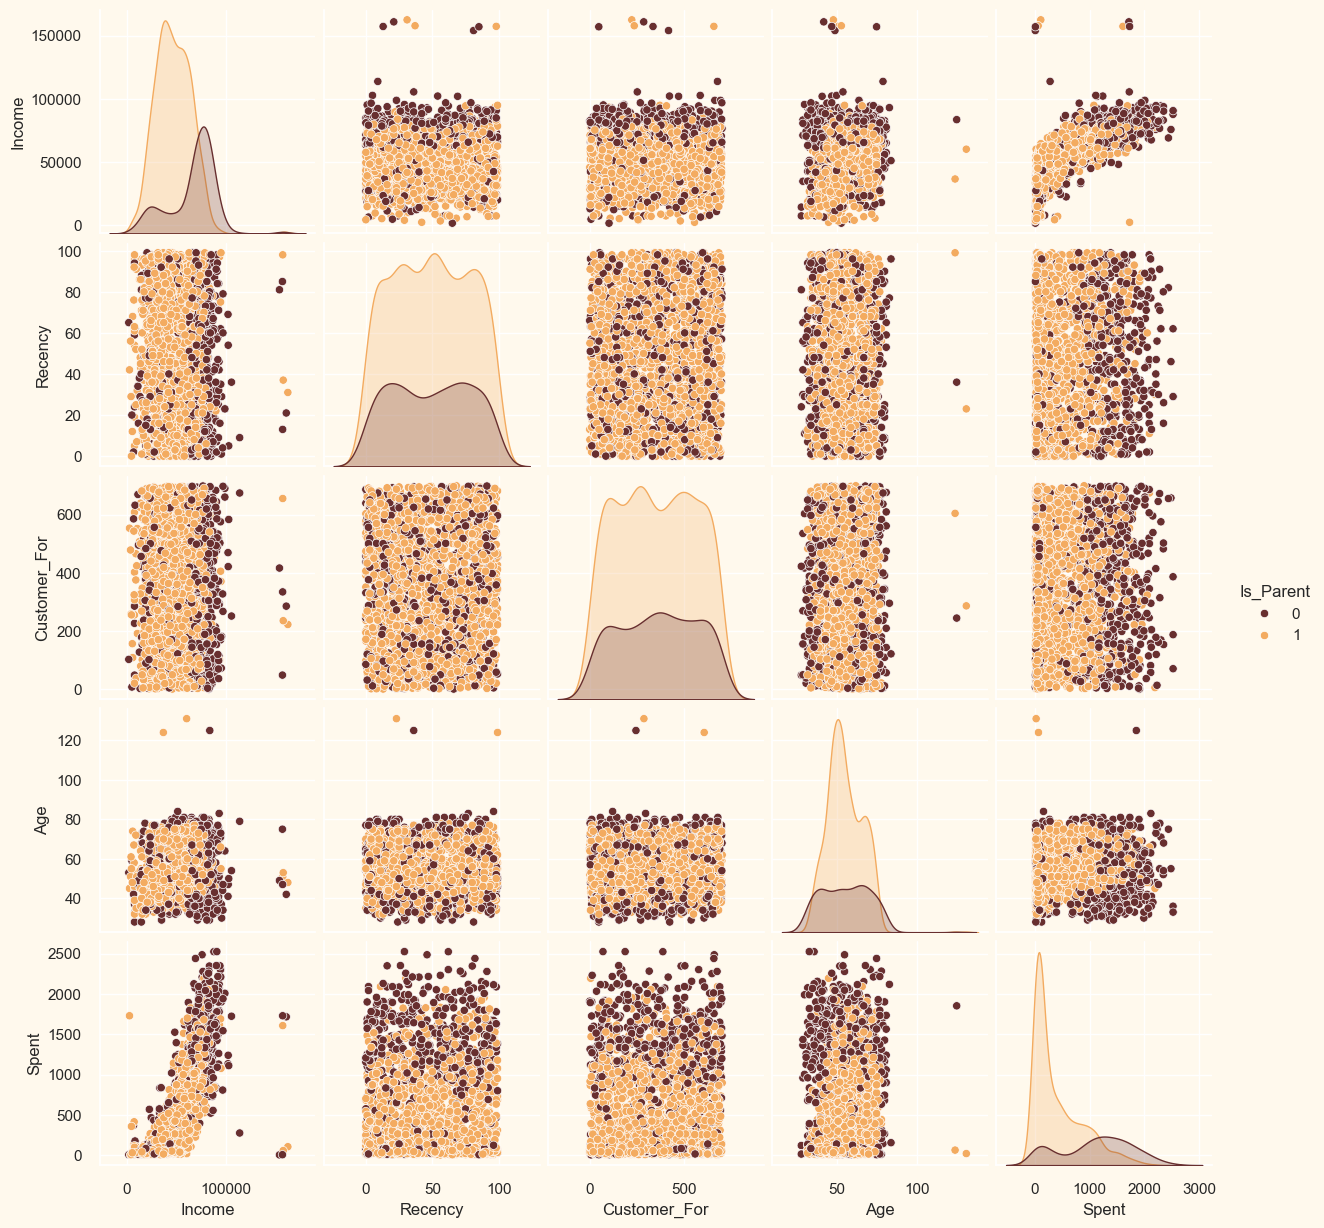

In [27]:
# Check if the lengths of dates and the DataFrame index are the same
if len(dates) != len(data):
    print(f"Warning: Length of dates ({len(dates)}) does not match length of data ({len(data)}).")
    # Adjust by slicing to match the shorter length
    min_length = min(len(dates), len(data))
    dates = dates[:min_length]  # Truncate dates list if necessary
    data = data.iloc[:min_length]  # Truncate DataFrame rows if necessary

# Created a feature "Customer_For"
d1 = max(dates)  # Assuming dates is a list/series of dates when customers joined
data["Customer_For"] = [(d1 - i).days for i in dates]

# To plot some selected features
# Setting up colors preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Features to plot
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

# Check if columns exist
missing_columns = [col for col in To_Plot if col not in data.columns]
if missing_columns:
    print(f"Warning: Columns {missing_columns} not found in the dataset")

# Plotting relative plot of selected features
print("Relative Plot of Some Selected Features: A Data Subset")
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=["#682F2F", "#F3AB60"])
plt.show()


In [28]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2190


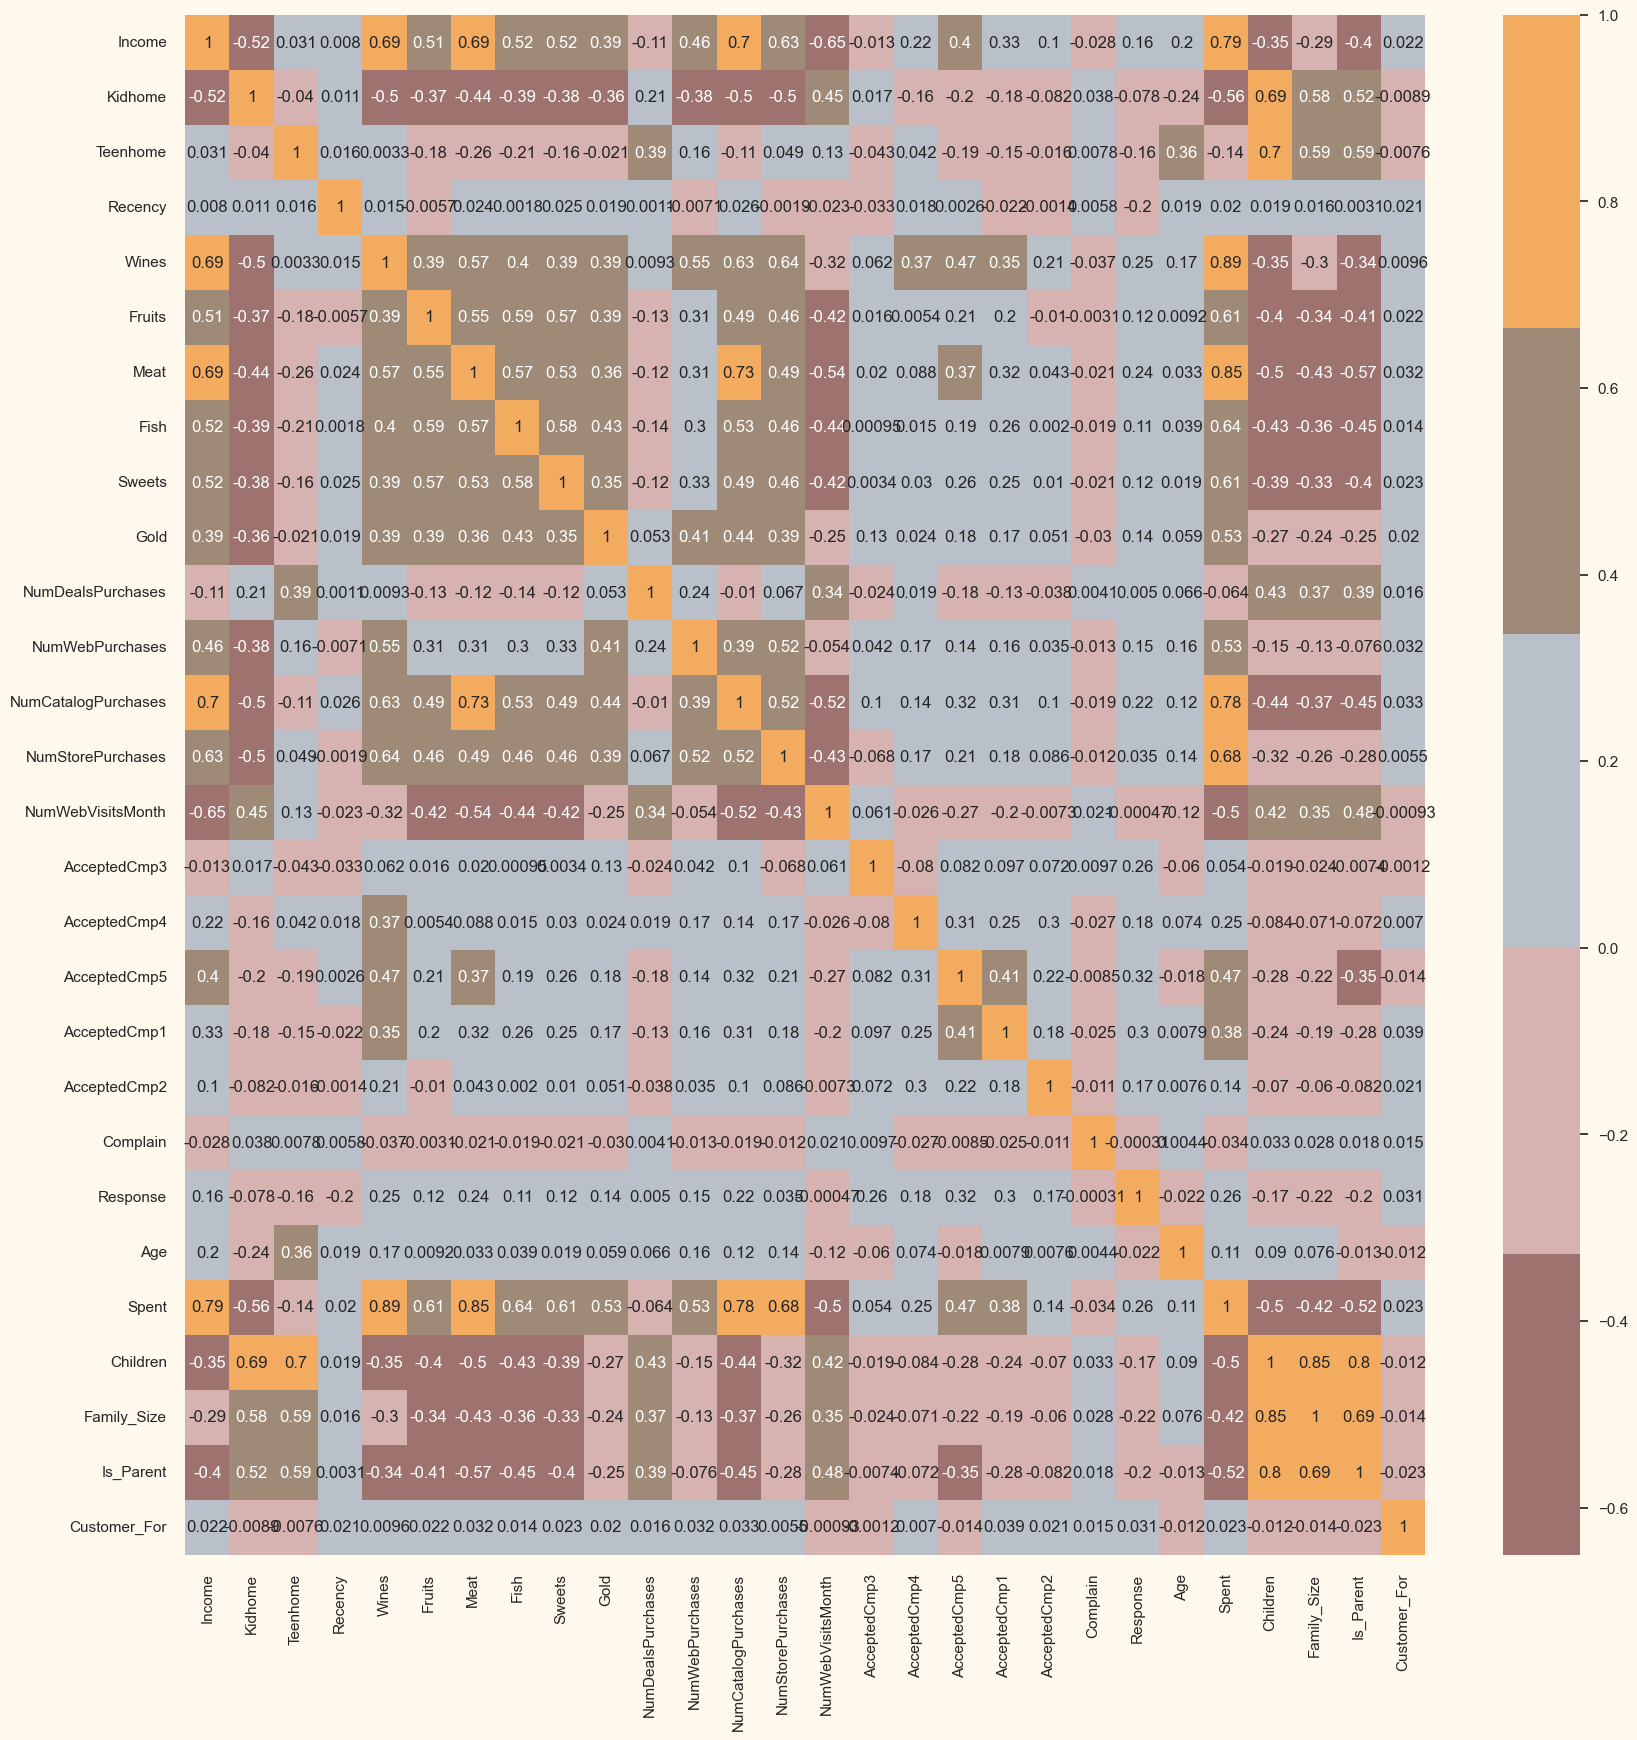

In [30]:
# Exclude non-numeric columns from the data
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation matrix
corrmat = numeric_data.corr()

# Set up the plot
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.show()


Data Preprocessing:

The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [31]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [32]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [33]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [34]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.894117  0.284665 -0.821452 -0.930516  0.310533  0.976290  1.551044   
1  -0.894117 -0.263164  1.046648  0.908680 -0.380066 -0.871724 -0.638937   
2  -0.894117  0.910577 -0.821452 -0.930516 -0.794425  0.357324  0.569328   
3  -0.894117 -1.178134  1.046648 -0.930516 -0.794425 -0.871724 -0.563420   
4   0.569348  0.291865  1.046648 -0.930516  1.553611 -0.391951  0.418295   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.682740  2.444423  1.479845  ...             2.495557          -0.556077   
1 -0.718578 -0.651731 -0.635155  ...            -0.571565          -1.171754   
2 -0.180505  1.333450 -0.148948  ...            -0.230773           1.290954   
3 -0.656322 -0.506029 -0.586534  ...            -0.912356          -0.556077   
4 -0.220527  0.149627 -0.003086  ...             0.110018           0.059600   

   NumWebVisitsMonth       Age     Spent  Living_With  Children  Family_Size  \
0           0.693593  1.016656  1.671733    -1.349876 -1.264657    -1.764494   
1          -0.130590  1.273153 -0.963051    -1.349876  1.409991     0.453148   
2          -0.542681  0.332665  0.278115     0.740809 -1.264657    -0.655673   
3           0.281502 -1.291815 -0.919967     0.740809  0.072667     0.453148   
4          -0.130590 -1.035318 -0.308498     0.740809  0.072667     0.453148   

   Is_Parent  Customer_For  
0  -1.578868      1.534934  
1   0.633365     -1.184002  
2  -1.578868     -0.200242  
3   0.633365     -1.055471  
4   0.633365     -0.946713  

[5 rows x 23 columns]

Dimensionality Reduction

In [35]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2190.0 -6.488975e-17  2.877836 -5.946671 -2.548546 -0.772920  2.399674   
col2  2190.0 -6.488975e-17  1.696802 -4.277505 -1.329773 -0.145908  1.238223   
col3  2190.0  6.083414e-17  1.153895 -3.959054 -0.810044  0.144737  0.897766   

           max  
col1  7.387131  
col2  6.122612  
col3  2.887120

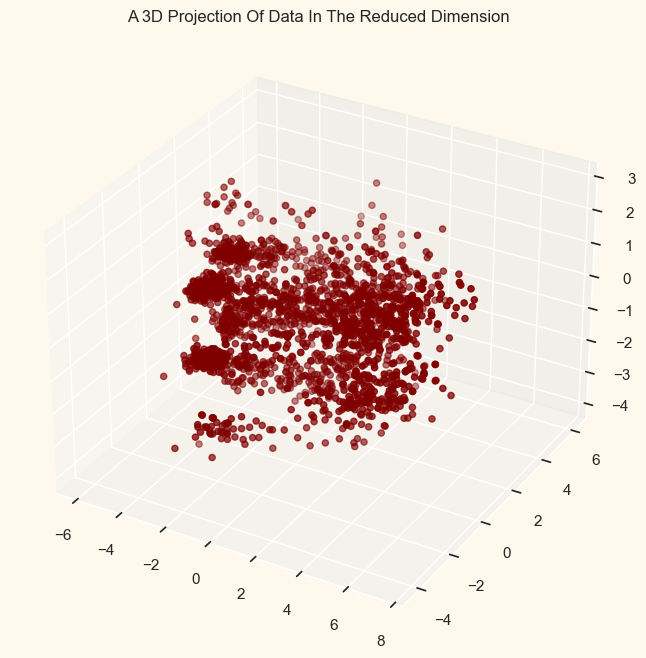

In [36]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Clustering

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


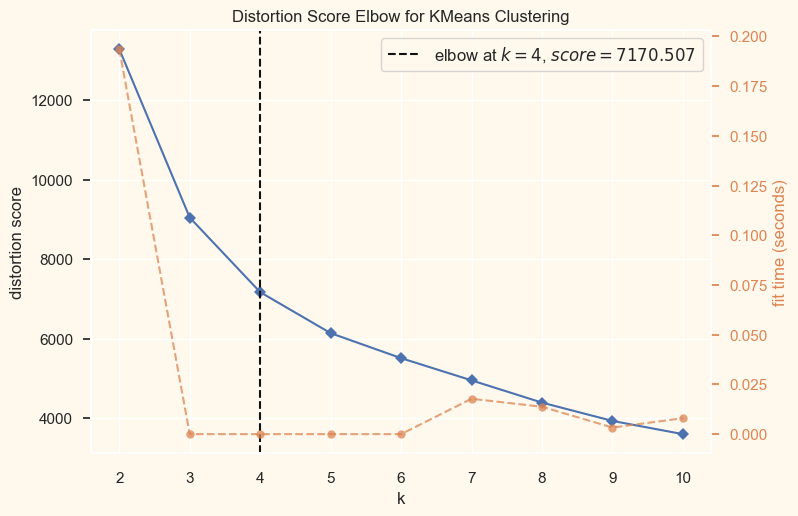

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [38]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

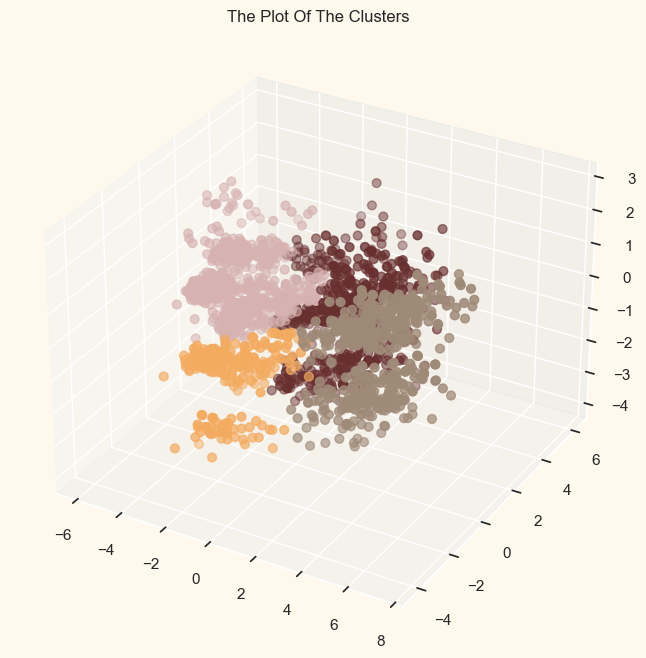

In [39]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Evaluating Models

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustering

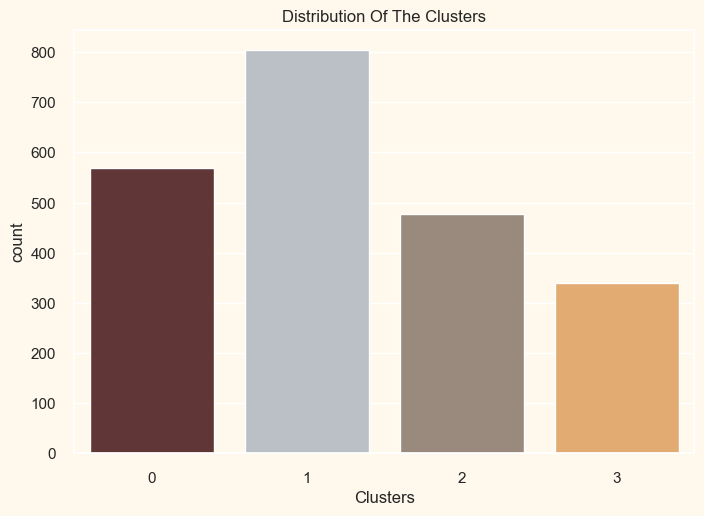

In [40]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

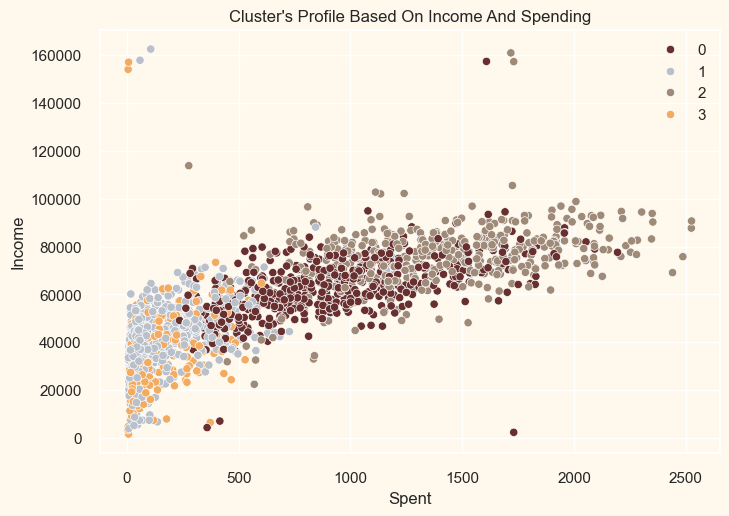

In [41]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

group 0: high spending & average income

group 1: high spending & high income

group 2: low spending & low income

group 3: high spending & low income

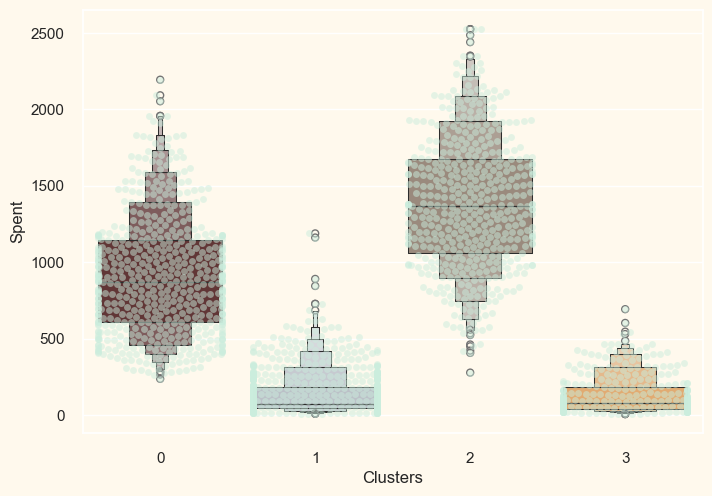

In [42]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()


From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

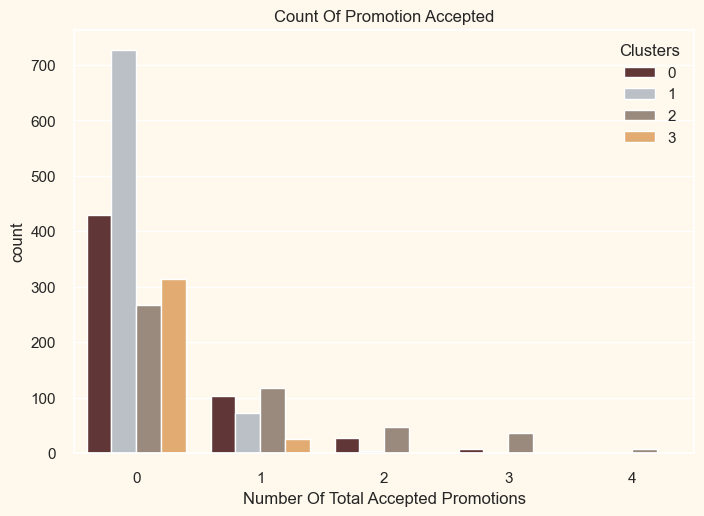

In [43]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

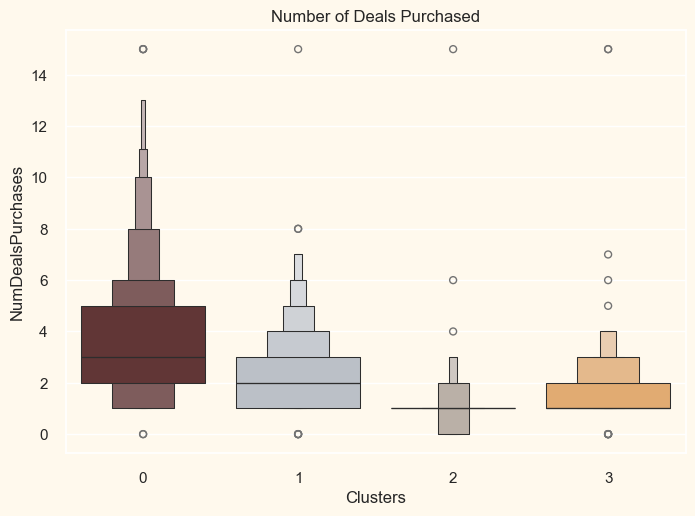

In [44]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly

Profiling


Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

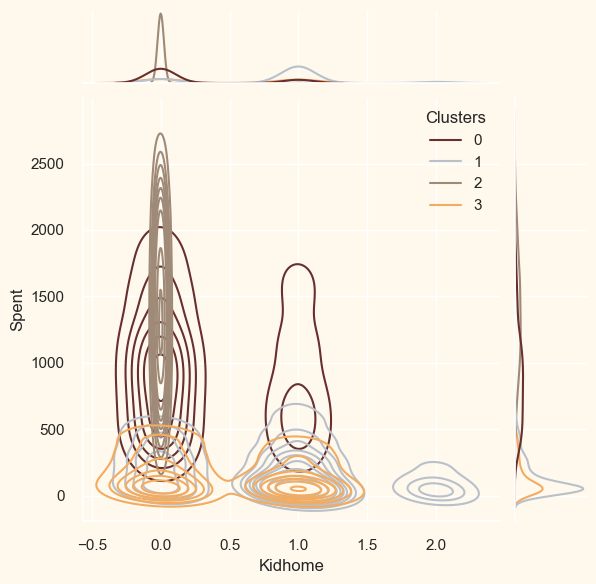

<Figure size 800x550 with 0 Axes>

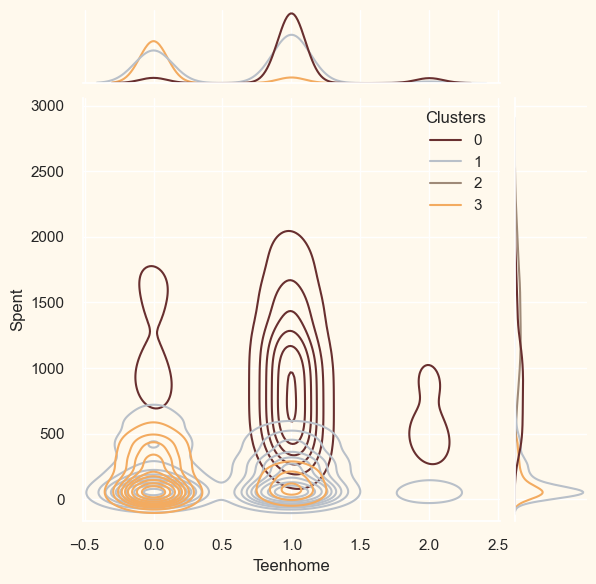

<Figure size 800x550 with 0 Axes>

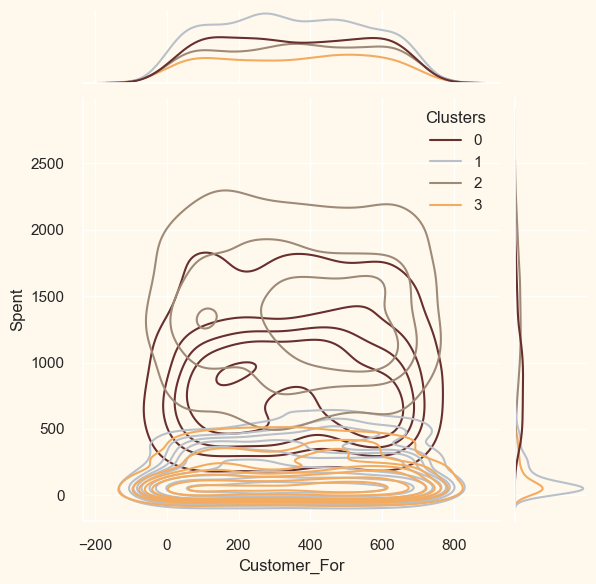

<Figure size 800x550 with 0 Axes>

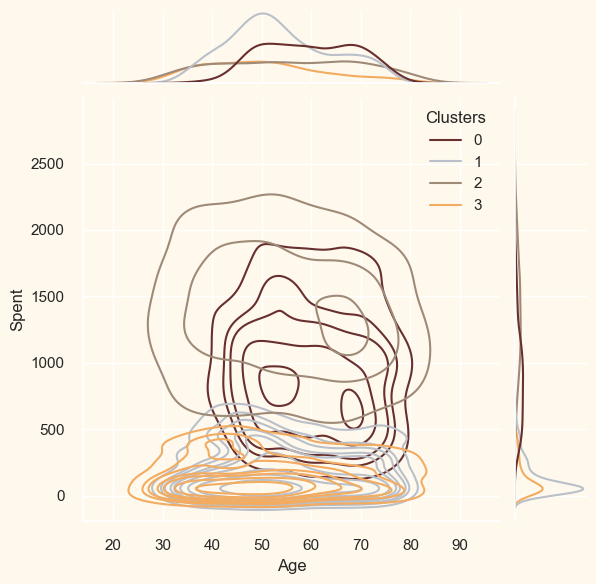

<Figure size 800x550 with 0 Axes>

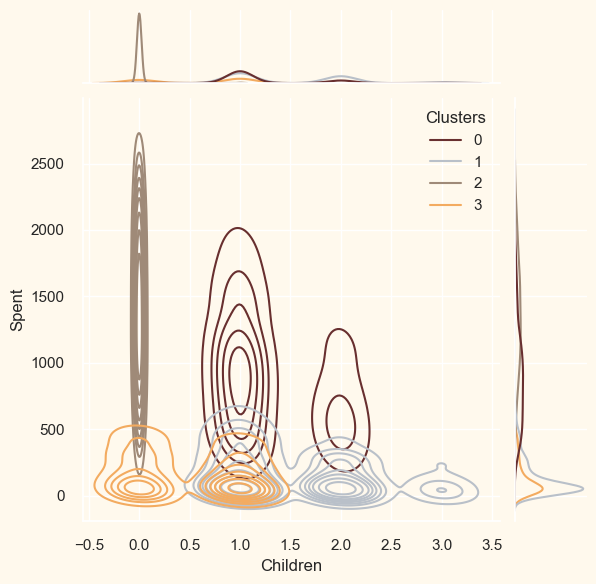

<Figure size 800x550 with 0 Axes>

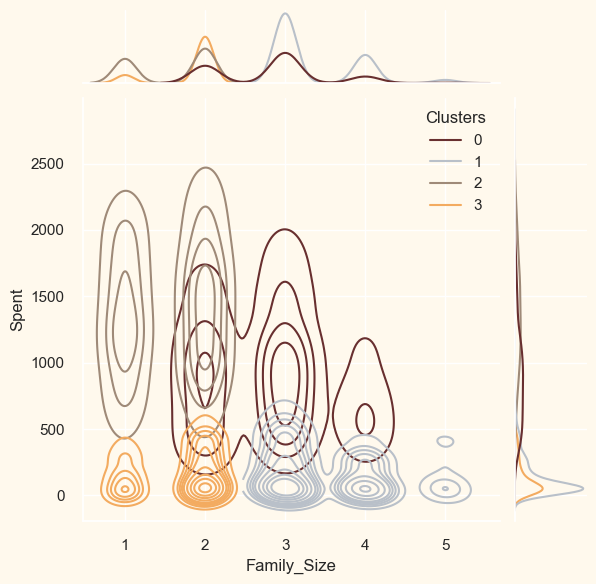

<Figure size 800x550 with 0 Axes>

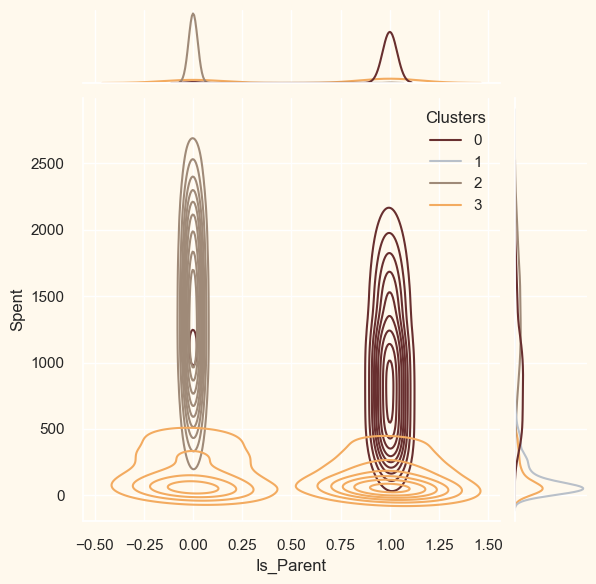

<Figure size 800x550 with 0 Axes>

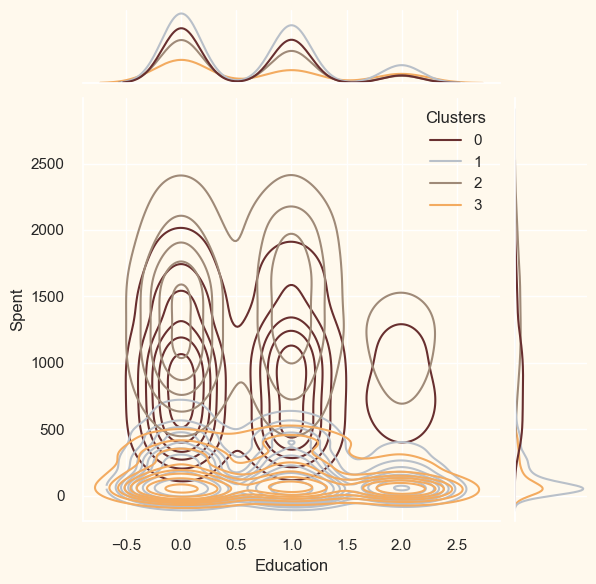

<Figure size 800x550 with 0 Axes>

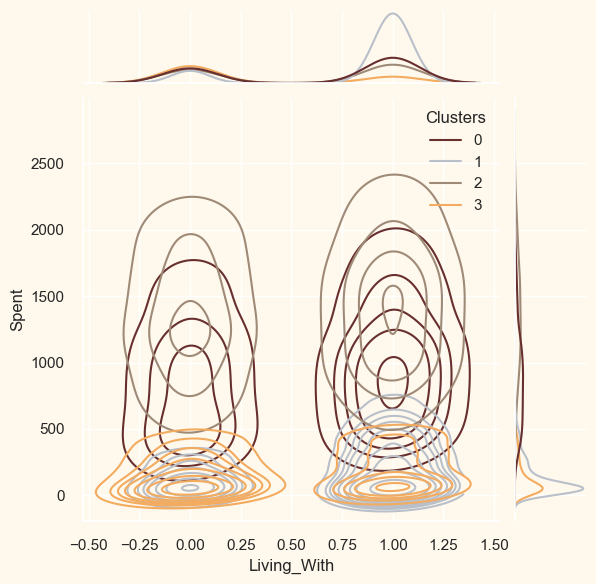

In [45]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()